# Assignment-11-Text Mining-02-Amazon Product Reviews

1) Extract reviews of any product from ecommerce website like amazon,
2) Perform emotion mining

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [76]:
reviews=pd.read_csv('extract_reviews_test2.csv')
reviews

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good prod6\n \n
1,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Power cord length ...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good\n \n
3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I used for only wa...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Great product! You...
...,...,...
1075,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Very less noise pr...
1076,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Very easy to use. ...
1077,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It’s been a month ...
1078,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Working Good and v...


## Text Preprocessing

In [77]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Good prod6',
 'Power cord length is very short. If you are having electrical point on 5 feet height then you have to move it down to 3 feet height.',
 'Good',
 'I used for only wasing. Awesome result.',
 'Great product! You need to check the dimensions of the washing machine with the place where you want to keep it before you order it. Use  front load liquid detergents only and better to use Bosch washing cover as well.Why all this? Because it is a costly product so keep it with care. Mixed load option is the one which is going to be used 90% time.',
 'Very less noise producing washing machine and also the power consumption is very less. Has very different modes to wash different kinds of clothing.  You can go for this product by spending an extra and buying this amazing washing machine',
 'Very easy to use. Have used this model sofar only twice. So can not say so soon about value for money.',
 'Good prod6',
 'It’s been a month since I bought it. Works good. Easy to use. It does make

In [79]:
reviews_text=' '.join(reviews)
reviews_text

'Good prod6 Power cord length is very short. If you are having electrical point on 5 feet height then you have to move it down to 3 feet height. Good I used for only wasing. Awesome result. Great product! You need to check the dimensions of the washing machine with the place where you want to keep it before you order it. Use  front load liquid detergents only and better to use Bosch washing cover as well.Why all this? Because it is a costly product so keep it with care. Mixed load option is the one which is going to be used 90% time. Very less noise producing washing machine and also the power consumption is very less. Has very different modes to wash different kinds of clothing.  You can go for this product by spending an extra and buying this amazing washing machine Very easy to use. Have used this model sofar only twice. So can not say so soon about value for money. Good prod6 It’s been a month since I bought it. Works good. Easy to use. It does make mild noise. Dries clothes upto 7

In [80]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Good prod6 Power cord length is very short If you are having electrical point on 5 feet height then you have to move it down to 3 feet height Good I used for only wasing Awesome result Great product You need to check the dimensions of the washing machine with the place where you want to keep it before you order it Use  front load liquid detergents only and better to use Bosch washing cover as wellWhy all this Because it is a costly product so keep it with care Mixed load option is the one which is going to be used 90 time Very less noise producing washing machine and also the power consumption is very less Has very different modes to wash different kinds of clothing  You can go for this product by spending an extra and buying this amazing washing machine Very easy to use Have used this model sofar only twice So can not say so soon about value for money Good prod6 It’s been a month since I bought it Works good Easy to use It does make mild noise Dries clothes upto 70 Installation was o

In [81]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [82]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Good', 'prod6', 'Power', 'cord', 'length', 'is', 'very', 'short', 'If', 'you', 'are', 'having', 'electrical', 'point', 'on', '5', 'feet', 'height', 'then', 'you', 'have', 'to', 'move', 'it', 'down', 'to', '3', 'feet', 'height', 'Good', 'I', 'used', 'for', 'only', 'wasing', 'Awesome', 'result', 'Great', 'product', 'You', 'need', 'to', 'check', 'the', 'dimensions', 'of', 'the', 'washing', 'machine', 'with']


In [83]:
len(text_tokens)

23004

In [84]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Good', 'prod6', 'Power', 'cord', 'length', 'short', 'If', 'electrical', 'point', '5', 'feet', 'height', 'move', '3', 'feet', 'height', 'Good', 'used', 'wasing', 'Awesome', 'result', 'Great', 'product', 'You', 'need', 'check', 'dimensions', 'washing', 'machine', 'place', 'want', 'keep', 'order', 'Use', 'front', 'load', 'liquid', 'detergents', 'better', 'use', 'Bosch', 'washing', 'cover', 'wellWhy', 'Because', 'costly', 'product', 'keep', 'care', 'Mixed', 'load', 'option', 'one', 'going', 'used', '90', 'time', 'Very', 'less', 'noise', 'producing', 'washing', 'machine', 'also', 'power', 'consumption', 'less', 'Has', 'different', 'modes', 'wash', 'different', 'kinds', 'clothing', 'You', 'go', 'product', 'spending', 'extra', 'buying', 'amazing', 'washing', 'machine', 'Very', 'easy', 'use', 'Have', 'used', 'model', 'sofar', 'twice', 'So', 'say', 'soon', 'value', 'money', 'Good', 'prod6', '’', 'month', 'since', 'bought', 'Works', 'good', 'Easy', 'use', 'make', 'mild', 'noise', 'Dries', 'clo

In [85]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['good', 'prod6', 'power', 'cord', 'length', 'short', 'if', 'electrical', 'point', '5', 'feet', 'height', 'move', '3', 'feet', 'height', 'good', 'used', 'wasing', 'awesome', 'result', 'great', 'product', 'you', 'need', 'check', 'dimensions', 'washing', 'machine', 'place', 'want', 'keep', 'order', 'use', 'front', 'load', 'liquid', 'detergents', 'better', 'use', 'bosch', 'washing', 'cover', 'wellwhy', 'because', 'costly', 'product', 'keep', 'care', 'mixed', 'load', 'option', 'one', 'going', 'used', '90', 'time', 'very', 'less', 'noise', 'producing', 'washing', 'machine', 'also', 'power', 'consumption', 'less', 'has', 'different', 'modes', 'wash', 'different', 'kinds', 'clothing', 'you', 'go', 'product', 'spending', 'extra', 'buying', 'amazing', 'washing', 'machine', 'very', 'easy', 'use', 'have', 'used', 'model', 'sofar', 'twice', 'so', 'say', 'soon', 'value', 'money', 'good', 'prod6', '’', 'month', 'since', 'bought', 'works', 'good', 'easy', 'use', 'make', 'mild', 'noise', 'dries', 'clo

In [86]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['good', 'prod6', 'power', 'cord', 'length', 'short', 'if', 'electr', 'point', '5', 'feet', 'height', 'move', '3', 'feet', 'height', 'good', 'use', 'wase', 'awesom', 'result', 'great', 'product', 'you', 'need', 'check', 'dimens', 'wash', 'machin', 'place', 'want', 'keep', 'order', 'use', 'front', 'load', 'liquid', 'deterg', 'better', 'use', 'bosch', 'wash', 'cover', 'wellwhi', 'becaus', 'costli', 'product', 'keep', 'care', 'mix', 'load', 'option', 'one', 'go', 'use', '90', 'time', 'veri', 'less', 'nois', 'produc', 'wash', 'machin', 'also', 'power', 'consumpt', 'less', 'ha', 'differ', 'mode', 'wash', 'differ', 'kind', 'cloth', 'you', 'go', 'product', 'spend', 'extra', 'buy', 'amaz', 'wash', 'machin', 'veri', 'easi', 'use', 'have', 'use', 'model', 'sofar', 'twice', 'so', 'say', 'soon', 'valu', 'money', 'good', 'prod6', '’', 'month', 'sinc', 'bought', 'work', 'good', 'easi', 'use', 'make', 'mild', 'nois', 'dri', 'cloth', 'upto', '70', 'instal', 'time', 'worth', 'work', 'good', 'valu', 'mo

In [87]:
#

In [88]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

good prod6 power cord length short if electrical point 5 feet height move 3 feet height good used wasing awesome result great product you need check dimensions washing machine place want keep order use front load liquid detergents better use bosch washing cover wellwhy because costly product keep care mixed load option one going used 90 time very less noise producing washing machine also power consumption less has different modes wash different kinds clothing you go product spending extra buying amazing washing machine very easy use have used model sofar twice so say soon value money good prod6 ’ month since bought works good easy use make mild noise dries clothes upto 70 installation time worth working good value money good working low noise make clean clothes go good prod6 power cord length short if electrical point 5 feet height move 3 feet height good used wasing awesome result great product you need check dimensions washing machine place want keep order use front load liquid deter

In [89]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['good', 'prod6', 'power', 'cord', 'length', 'short', 'if', 'electrical', 'point', '5', 'foot', 'height', 'move', '3', 'foot', 'height', 'good', 'use', 'wase', 'awesome', 'result', 'great', 'product', 'you', 'need', 'check', 'dimension', 'washing', 'machine', 'place', 'want', 'keep', 'order', 'use', 'front', 'load', 'liquid', 'detergent', 'well', 'use', 'bosch', 'washing', 'cover', 'wellwhy', 'because', 'costly', 'product', 'keep', 'care', 'mixed', 'load', 'option', 'one', 'going', 'use', '90', 'time', 'very', 'less', 'noise', 'produce', 'washing', 'machine', 'also', 'power', 'consumption', 'less', 'have', 'different', 'mode', 'wash', 'different', 'kind', 'clothing', 'you', 'go', 'product', 'spend', 'extra', 'buying', 'amazing', 'washing', 'machine', 'very', 'easy', 'use', 'have', 'use', 'model', 'sofar', 'twice', 'so', 'say', 'soon', 'value', 'money', 'good', 'prod6', "'", 'month', 'since', 'buy', 'work', 'good', 'easy', 'use', 'make', 'mild', 'noise', 'dry', 'clothe', 'upto', '70', '

In [90]:
clean_reviews=' '.join(lemmas)
clean_reviews

"good prod6 power cord length short if electrical point 5 foot height move 3 foot height good use wase awesome result great product you need check dimension washing machine place want keep order use front load liquid detergent well use bosch washing cover wellwhy because costly product keep care mixed load option one going use 90 time very less noise produce washing machine also power consumption less have different mode wash different kind clothing you go product spend extra buying amazing washing machine very easy use have use model sofar twice so say soon value money good prod6 ' month since buy work good easy use make mild noise dry clothe upto 70 installation time worth work good value money good work low noise make clean clothe go good prod6 power cord length short if electrical point 5 foot height move 3 foot height good use wase awesome result great product you need check dimension washing machine place want keep order use front load liquid detergent well use bosch washing cove

## Feature Extaction

### 1. Using CountVectorizer

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [92]:
print(cv.vocabulary_)

{'good': 29, 'prod6': 59, 'power': 58, 'cord': 15, 'length': 37, 'short': 64, 'if': 33, 'electrical': 23, 'point': 57, 'foot': 25, 'height': 32, 'move': 50, 'use': 73, 'wase': 77, 'awesome': 4, 'result': 62, 'great': 30, 'product': 61, 'you': 84, 'need': 51, 'check': 10, 'dimension': 20, 'washing': 79, 'machine': 42, 'place': 56, 'want': 76, 'keep': 35, 'order': 55, 'front': 26, 'load': 40, 'liquid': 39, 'detergent': 18, 'well': 80, 'bosch': 6, 'cover': 17, 'wellwhy': 81, 'because': 5, 'costly': 16, 'care': 9, 'mixed': 45, 'option': 54, 'one': 53, 'going': 28, '90': 1, 'time': 70, 'very': 75, 'less': 38, 'noise': 52, 'produce': 60, 'also': 2, 'consumption': 14, 'have': 31, 'different': 19, 'mode': 46, 'wash': 78, 'kind': 36, 'clothing': 13, 'go': 27, 'spend': 69, 'extra': 24, 'buying': 8, 'amazing': 3, 'easy': 22, 'model': 47, 'sofar': 67, 'twice': 71, 'so': 66, 'say': 63, 'soon': 68, 'value': 74, 'money': 48, 'month': 49, 'since': 65, 'buy': 7, 'work': 82, 'make': 43, 'mild': 44, 'dry

In [93]:
print(cv.get_feature_names_out())

['70' '90' 'also' 'amazing' 'awesome' 'because' 'bosch' 'buy' 'buying'
 'care' 'check' 'clean' 'clothe' 'clothing' 'consumption' 'cord' 'costly'
 'cover' 'detergent' 'different' 'dimension' 'dry' 'easy' 'electrical'
 'extra' 'foot' 'front' 'go' 'going' 'good' 'great' 'have' 'height' 'if'
 'installation' 'keep' 'kind' 'length' 'less' 'liquid' 'load' 'low'
 'machine' 'make' 'mild' 'mixed' 'mode' 'model' 'money' 'month' 'move'
 'need' 'noise' 'one' 'option' 'order' 'place' 'point' 'power' 'prod6'
 'produce' 'product' 'result' 'say' 'short' 'since' 'so' 'sofar' 'soon'
 'spend' 'time' 'twice' 'upto' 'use' 'value' 'very' 'want' 'wase' 'wash'
 'washing' 'well' 'wellwhy' 'work' 'worth' 'you']


In [94]:
print(reviewscv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [95]:
print(reviewscv.toarray().shape)

(13608, 85)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [96]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [97]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['70' '90' 'also' 'amazing' 'awesome' 'because' 'bosch' 'buy' 'buying'
 'care' 'check' 'clean' 'clothe' 'clothing' 'consumption' 'cord' 'costly'
 'cover' 'detergent' 'different' 'dimension' 'dry' 'easy' 'electrical'
 'extra' 'foot' 'front' 'go' 'going' 'good' 'great' 'have' 'height' 'if'
 'installation' 'keep' 'kind' 'length' 'less' 'liquid' 'load' 'low'
 'machine' 'make' 'mild' 'mixed' 'mode' 'model' 'money' 'month' 'move'
 'need' 'noise' 'one' 'option' 'order' 'place' 'point' 'power' 'prod6'
 'produce' 'product' 'result' 'say' 'short' 'since' 'so' 'sofar' 'soon'
 'spend' 'time' 'twice' 'upto' 'use' 'value' 'very' 'want' 'wase' 'wash'
 'washing' 'well' 'wellwhy' 'work' 'worth' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [99]:
print(tfidfv_ngram_max_features.get_feature_names_out())
print(tfidf_matrix_ngram.toarray())

['70' '90' 'also' 'amazing' 'awesome' 'because' 'bosch' 'buy' 'buying'
 'care' 'check' 'clean' 'clothe' 'clothing' 'consumption' 'cord' 'costly'
 'cover' 'detergent' 'different' 'dimension' 'dry' 'easy' 'electrical'
 'extra' 'foot' 'front' 'go' 'going' 'good' 'great' 'have' 'height' 'if'
 'installation' 'keep' 'kind' 'length' 'less' 'liquid' 'load' 'low'
 'machine' 'make' 'mild' 'mixed' 'mode' 'model' 'money' 'month' 'move'
 'need' 'noise' 'one' 'option' 'order' 'place' 'point' 'power' 'prod6'
 'produce' 'product' 'result' 'say' 'short' 'since' 'so' 'sofar' 'soon'
 'spend' 'time' 'twice' 'upto' 'use' 'value' 'very' 'want' 'wase' 'wash'
 'washing' 'well' 'wellwhy' 'work' 'worth' 'you']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Generate Word Cloud

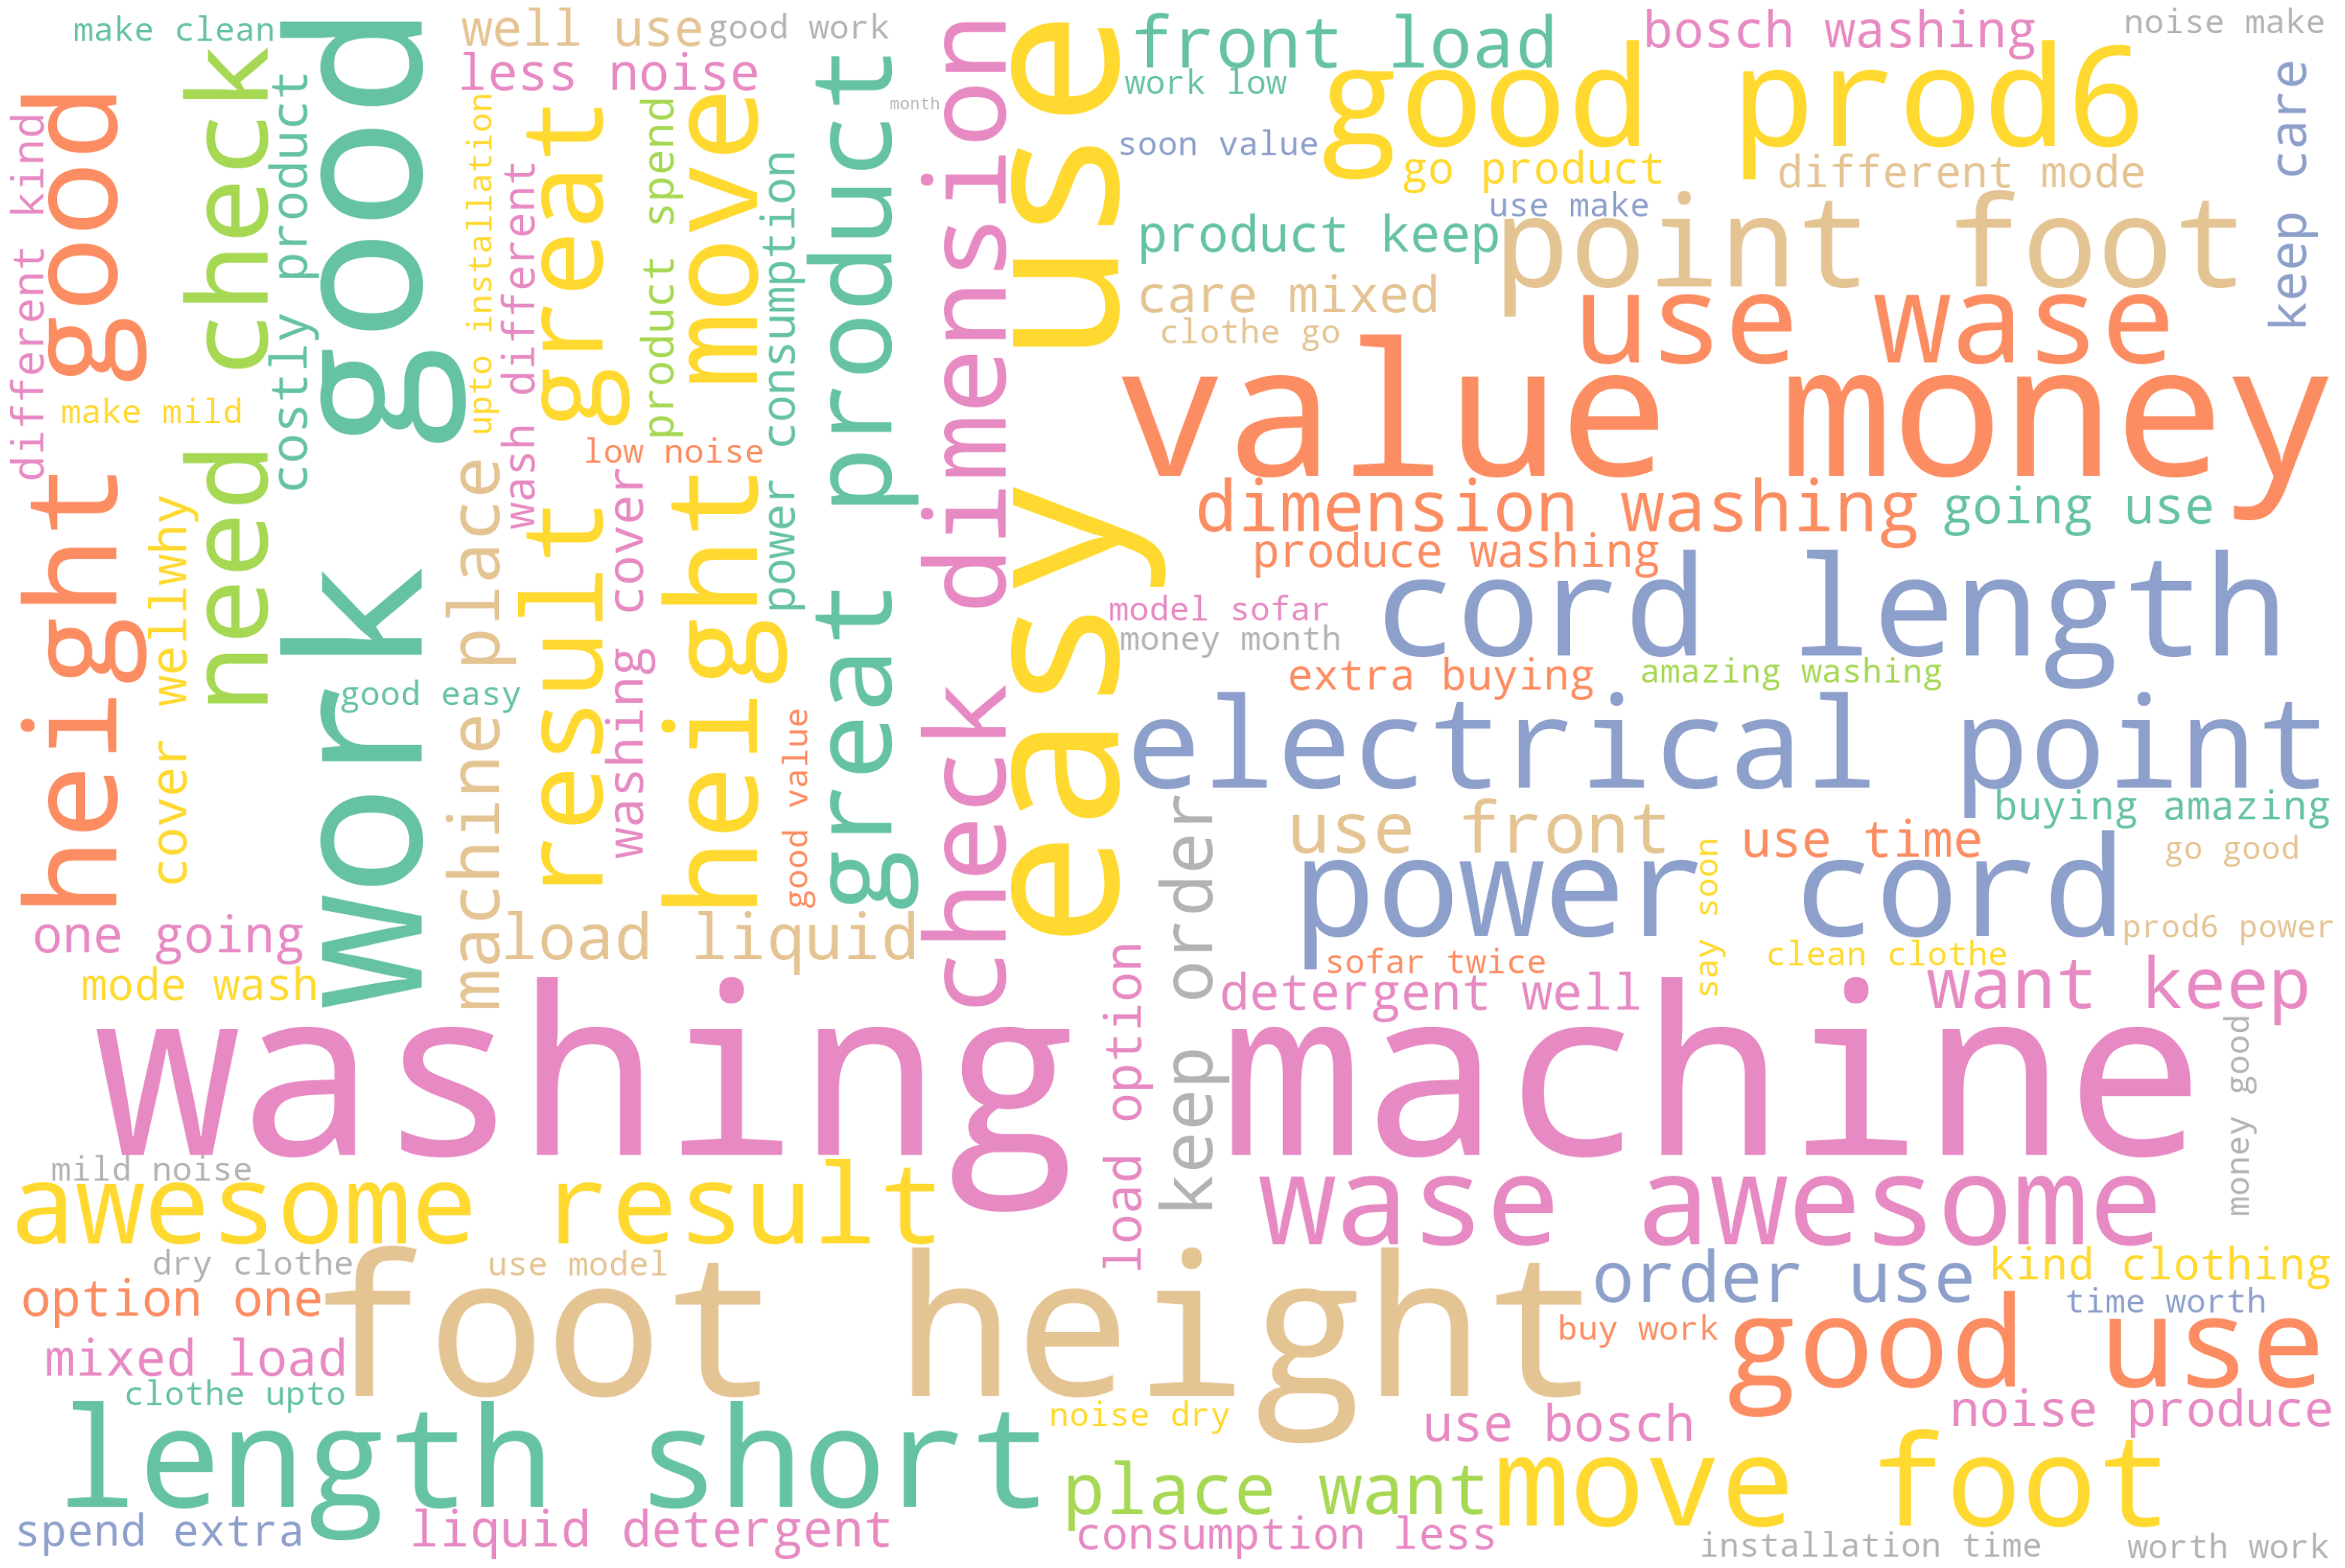

In [100]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [101]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [102]:
for token in doc_block[100:200]:
    print(token,token.pos_)

since SCONJ
buy NOUN
work NOUN
good ADJ
easy ADJ
use NOUN
make VERB
mild ADJ
noise NOUN
dry ADJ
clothe PROPN
upto NOUN
70 NUM
installation NOUN
time NOUN
worth ADJ
work VERB
good ADJ
value NOUN
money NOUN
good ADJ
work NOUN
low ADJ
noise NOUN
make VERB
clean ADJ
clothe NOUN
go VERB
good ADJ
prod6 PROPN
power NOUN
cord NOUN
length PROPN
short ADJ
if SCONJ
electrical ADJ
point NOUN
5 NUM
foot NOUN
height NOUN
move VERB
3 NUM
foot NOUN
height NOUN
good ADJ
use NOUN
wase NOUN
awesome ADJ
result VERB
great ADJ
product NOUN
you PRON
need VERB
check VERB
dimension NOUN
washing NOUN
machine NOUN
place NOUN
want VERB
keep VERB
order NOUN
use VERB
front ADJ
load NOUN
liquid ADJ
detergent NOUN
well ADV
use VERB
bosch ADJ
washing NOUN
cover NOUN
wellwhy VERB
because SCONJ
costly ADJ
product NOUN
keep VERB
care NOUN
mixed ADJ
load NOUN
option NOUN
one NUM
going AUX
use NOUN
90 NUM
time NOUN
very ADV
less ADV
noise NOUN
produce NOUN
washing NOUN
machine NOUN
also ADV
power NOUN
consumption NOUN
less

In [103]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['washing', 'cover', 'wellwhy', 'product', 'keep', 'care', 'load', 'option', 'use', 'time', 'noise', 'produce', 'washing', 'machine', 'power', 'consumption', 'have', 'mode', 'wash', 'kind', 'clothing', 'go', 'product', 'spend', 'buying', 'washing', 'machine', 'use', 'use', 'model', 'say', 'value', 'money', 'month', 'buy', 'work', 'use', 'make', 'noise', 'upto', 'installation', 'time', 'power', 'cord', 'point', 'foot', 'height', 'move', 'foot', 'height', 'use', 'wase', 'result', 'product', 'need', 'check', 'dimension', 'washing', 'machine', 'place', 'want', 'keep', 'order', 'use', 'load', 'detergent', 'use', 'washing', 'cover', 'wellwhy', 'product', 'keep', 'care', 'load', 'option', 'use', 'time', 'noise', 'produce', 'washing', 'machine', 'power', 'consumption', 'have', 'mode', 'wash', 'kind', 'clothing', 'go', 'product', 'spend', 'buying', 'washing', 'machine', 'use', 'use', 'model', 'say', 'value', 'money']


In [104]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,use,756
1,washing,432
2,product,324
3,machine,324
4,noise,324
5,work,324
6,foot,216
7,height,216
8,keep,216
9,load,216


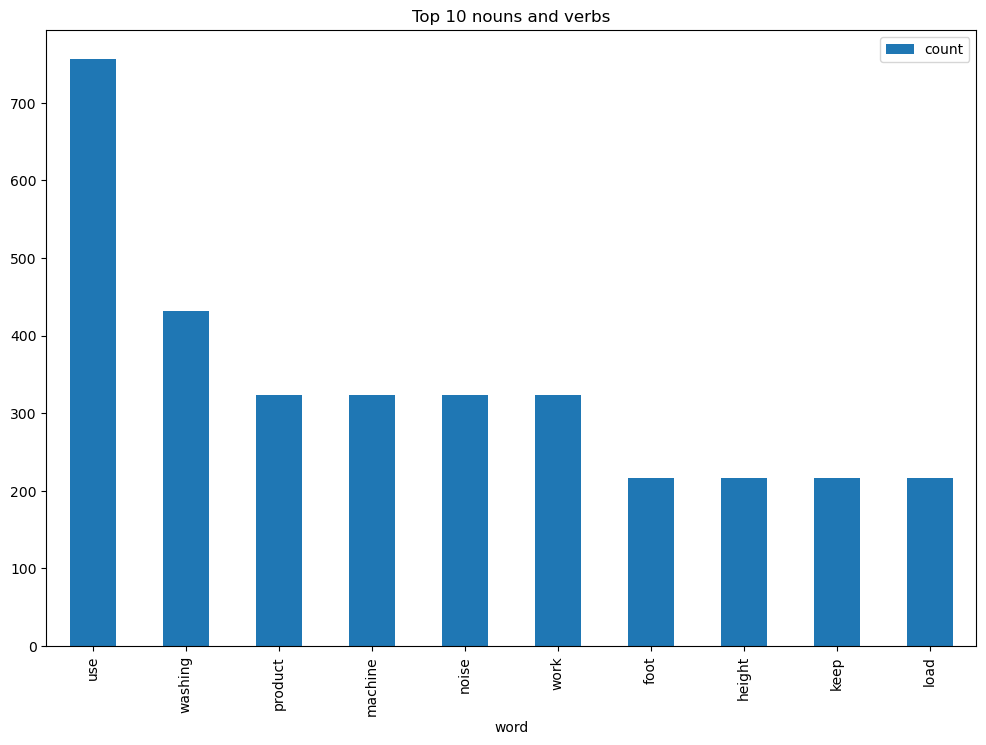

In [105]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [106]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Good prod6 Power cord length is very short.',
 'If you are having electrical point on 5 feet height then you have to move it down to 3 feet height.',
 'Good I used for only wasing.',
 'Awesome result.',
 'Great product!',
 'You need to check the dimensions of the washing machine with the place where you want to keep it before you order it.',
 'Use  front load liquid detergents only and better to use Bosch washing cover as well.Why all this?',
 'Because it is a costly product so keep it with care.',
 'Mixed load option is the one which is going to be used 90% time.',
 'Very less noise producing washing machine and also the power consumption is very less.',
 'Has very different modes to wash different kinds of clothing.',
 'You can go for this product by spending an extra and buying this amazing washing machine Very easy to use.',
 'Have used this model sofar only twice.',
 'So can not say so soon about value for money.',
 'Good prod6 It’s been a month since I bought it.',
 'Works good

In [107]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Good prod6 Power cord length is very short.
1,If you are having electrical point on 5 feet h...
2,Good I used for only wasing.
3,Awesome result.
4,Great product!
...,...
2372,Dries clothes upto 70%.
2373,Installation was on time.
2374,Worth it.
2375,Working Good and value for money Good working ...


In [108]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon\t,-2
1,abandoned\t,-2
2,abandons\t,-2
3,abducted\t,-2
4,abduction\t,-2
...,...,...
2472,yucky\t,-2
2473,yummy\t,3
2474,zealot\t,-2
2475,zealots\t,-2


In [109]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon\t': -2,
 'abandoned\t': -2,
 'abandons\t': -2,
 'abducted\t': -2,
 'abduction\t': -2,
 'abductions\t': -2,
 'abhor\t': -3,
 'abhorred\t': -3,
 'abhorrent\t': -3,
 'abhors\t': -3,
 'abilities\t': 2,
 'ability\t': 2,
 'aboard\t': 1,
 'absentee\t': -1,
 'absentees\t': -1,
 'absolve\t': 2,
 'absolved\t': 2,
 'absolves\t': 2,
 'absolving\t': 2,
 'absorbed\t': 1,
 'abuse\t': -3,
 'abused\t': -3,
 'abuses\t': -3,
 'abusive\t': -3,
 'accept\t': 1,
 'accepted\t': 1,
 'accepting\t': 1,
 'accepts\t': 1,
 'accident\t': -2,
 'accidental\t': -2,
 'accidentally\t': -2,
 'accidents\t': -2,
 'accomplish\t': 2,
 'accomplished\t': 2,
 'accomplishes\t': 2,
 'accusation\t': -2,
 'accusations\t': -2,
 'accuse\t': -2,
 'accused\t': -2,
 'accuses\t': -2,
 'accusing\t': -2,
 'ache\t': -2,
 'achievable\t': 1,
 'aching\t': -2,
 'acquit\t': 2,
 'acquits\t': 2,
 'acquitted\t': 2,
 'acquitting\t': 2,
 'acrimonious\t': -3,
 'active\t': 1,
 'adequate\t': 1,
 'admire\t': 3,
 'admired\t': 3,
 'admires\t': 3,


In [110]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [111]:
# manual testing
calculate_sentiment(text='good service')

0

In [112]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       0
2       0
3       0
4       0
       ..
2372    0
2373    0
2374    0
2375    0
2376    0
Name: sentiment_value, Length: 2377, dtype: int64

In [113]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        8
1       21
2        6
3        2
4        2
        ..
2372     4
2373     4
2374     2
2375    15
2376     3
Name: word_count, Length: 2377, dtype: int64

In [114]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
0,Good prod6 Power cord length is very short.,0,8
1580,Dries clothes upto 70%.,0,4
1581,Installation was on time.,0,4
1582,Worth it.,0,2
1583,Working Good and value for money Good working ...,0,15
...,...,...,...
793,If you are having electrical point on 5 feet h...,0,21
794,Good I used for only wasing.,0,6
795,Awesome result.,0,2
797,You need to check the dimensions of the washin...,0,23


In [115]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    2377.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: sentiment_value, dtype: float64

In [116]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,Good prod6 Power cord length is very short.,0,8
1,If you are having electrical point on 5 feet h...,0,21
2,Good I used for only wasing.,0,6
3,Awesome result.,0,2
4,Great product!,0,2
...,...,...,...
2372,Dries clothes upto 70%.,0,4
2373,Installation was on time.,0,4
2374,Worth it.,0,2
2375,Working Good and value for money Good working ...,0,15


In [117]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count


In [118]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Good prod6 Power cord length is very short.,0,8,0
1,If you are having electrical point on 5 feet h...,0,21,1
2,Good I used for only wasing.,0,6,2
3,Awesome result.,0,2,3
4,Great product!,0,2,4
...,...,...,...,...
2372,Dries clothes upto 70%.,0,4,2372
2373,Installation was on time.,0,4,2373
2374,Worth it.,0,2,2374
2375,Working Good and value for money Good working ...,0,15,2375


C:\Users\prasa\AppData\Local\Temp\ipykernel_17332\3058573524.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_value'])
C:\Users\prasa\anaconda3\anaconda4\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='sentiment_value', ylabel='Density'>

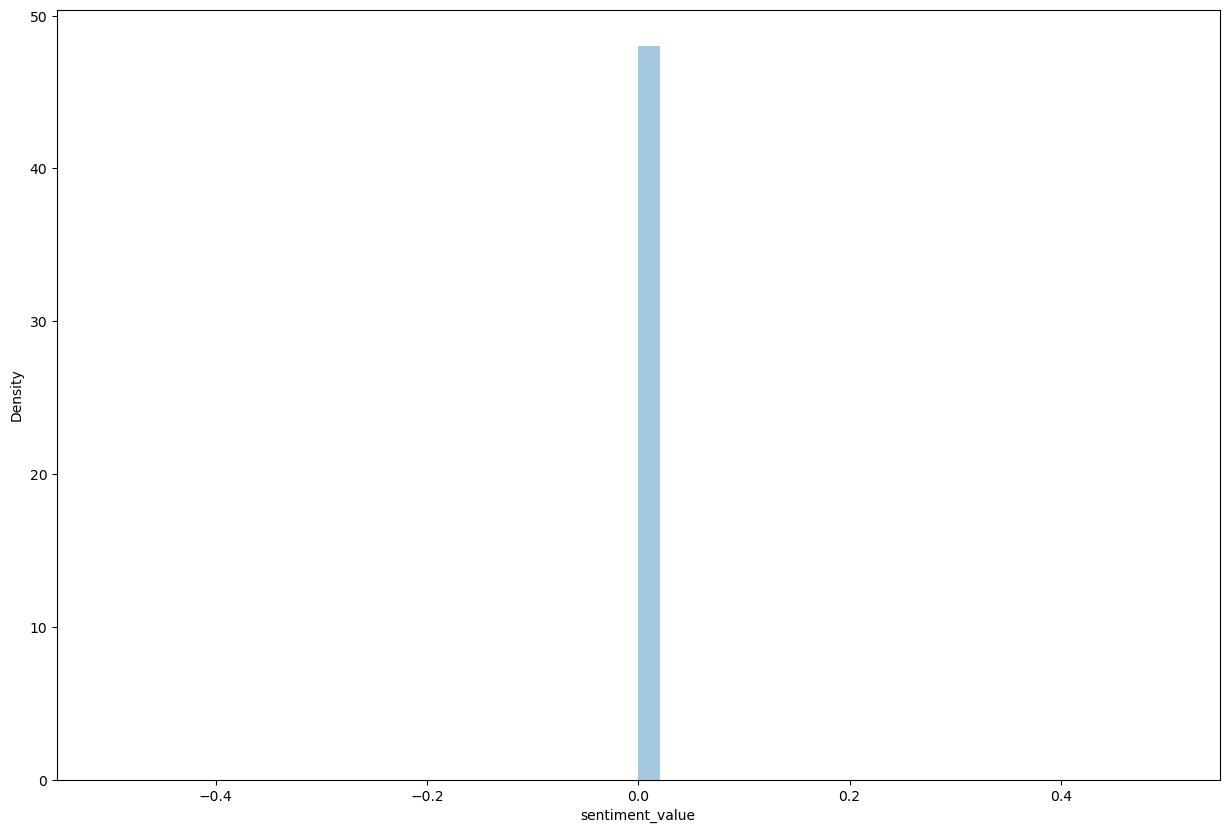

In [119]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

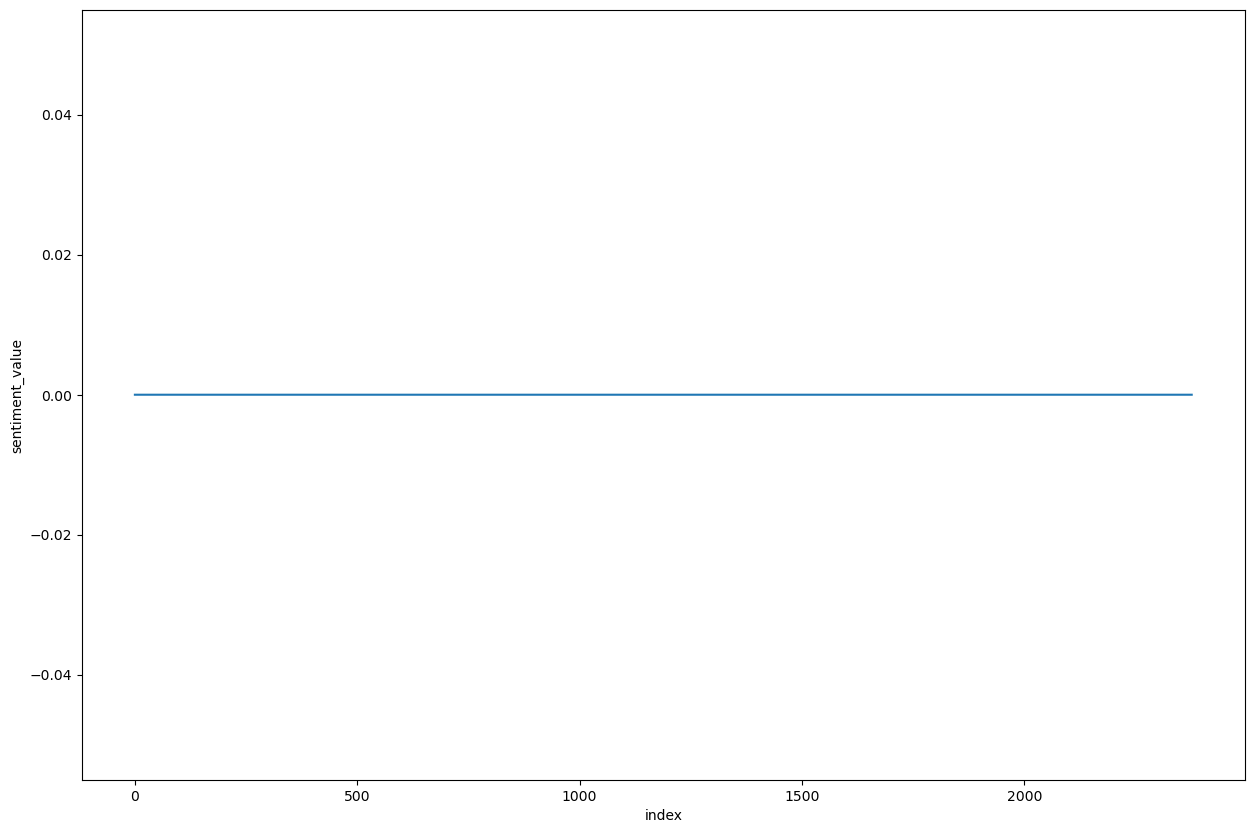

In [120]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)